Creación de modelos usando Sequential --- 0:00 min
===

* Última modificación: Marzo 7, 2022 | YouTube

* Adaptado de: https://keras.io/api/models/sequential/

Importación de librerías
---

In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf

tf.__version__

'2.8.0'

Sequential
--

Crea un `tf.keras.Model` como una secuencia lineal de capas.

In [2]:
#
# Creación de capas indicando las dimensiones de la capa de entrada
# con input_shape()
#
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
model.add(tf.keras.layers.Dense(4))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
Total params: 172
Trainable params: 172
Non-trainable params: 0
_________________________________________________________________


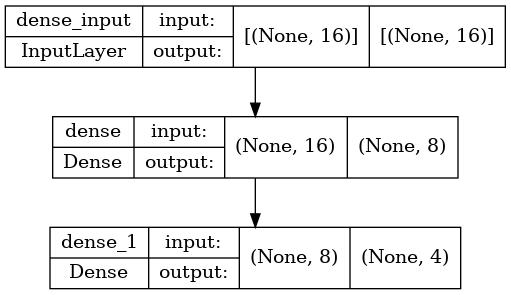

In [3]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [4]:
#
# Pesos asociados a las capas del modelo
#
model.weights

[<tf.Variable 'dense/kernel:0' shape=(16, 8) dtype=float32, numpy=
 array([[ 0.21297538, -0.06917584,  0.49518156,  0.16121781, -0.301906  ,
         -0.16776037, -0.02052736,  0.24758387],
        [-0.45558465,  0.12556005,  0.14351773, -0.46169877, -0.10797024,
          0.10134923,  0.05321169, -0.47283244],
        [ 0.3502996 ,  0.27313387,  0.08184409,  0.32102013, -0.4839846 ,
          0.3878678 ,  0.0789268 ,  0.19108367],
        [-0.32651258,  0.22070694, -0.2904836 , -0.48260987, -0.3180486 ,
          0.48315907, -0.09891117, -0.42583823],
        [-0.14858425, -0.07843637, -0.15283501,  0.15224314, -0.0353502 ,
         -0.49160874,  0.14190066,  0.05476511],
        [-0.03854203,  0.07533491, -0.28070855, -0.45603824, -0.27134466,
          0.2718451 ,  0.44840956, -0.03171229],
        [-0.41868627, -0.46338952, -0.07317257, -0.284297  ,  0.1455462 ,
         -0.2148161 , -0.27619612, -0.25541437],
        [ 0.2663293 , -0.2722702 , -0.27412713, -0.1529876 , -0.42223954

In [5]:
#
# Creación del modelo como una lista de capas indicando las dimensiones de la
# capa de entrada con input_shape
#
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(8, input_shape=(16,)),
        tf.keras.layers.Dense(4),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
Total params: 172
Trainable params: 172
Non-trainable params: 0
_________________________________________________________________


In [6]:
#
# Especificación de una capa de entrada con tf.keras.Input()
#
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(8))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


In [7]:
#
# En el siguiente código no se especifica las dimensiones de la entrada. El
# modelo no tiene pesos hasta que se haga una llamada a training/evaluation
#
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4))
#
# Si se llama a model.summary() se genera un error
#

![assets/error_summary.png](assets/error_summary.png)

In [8]:
#
# Si se especifica input_shape, el modleo es construído a medida que se van
# adicionando capas
#
model = tf.keras.Sequential()
model.add(
    tf.keras.layers.Dense(8, input_shape=(16,)),
)
model.add(tf.keras.layers.Dense(4))
len(model.weights)

4

In [9]:
#
# Cuando el modelo usa construcción pospuesta, es decir, no se especifican las
# dimensiones de la entrada, este pueden ser construido manualmente con build.
#
#   `build(batch_input_shape)`
#
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4))
model.build((None, 16))
len(model.weights)

4

In [10]:
#
# Cuando el modelo usa construcción pospuesta, es decir, no se especifican las
# dimensiones de la entrada, el modelo es construido internamente cuando se
# llama por primera vez a `fit`, `eval` o `predict`.
#
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1))
model.predict(
    tf.constant(
        [
            [1, 1, 1],
            [2, 2, 2],
        ]
    )
)

array([[-0.07940249],
       [-0.15880498]], dtype=float32)

In [11]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 8)                 32        
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [12]:
#
# Las capas también pueden ser eliminadas usando `pop()``
#
model.pop()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 8)                 32        
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________
